# IMPORTS

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

from config import *
from models import *
from metrics import *
from augmentor import Augmentor
from data_generator import DataGenerator

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import random
import json
from datetime import datetime

# Training

In [1]:
# AUGMENT IMAGES 
TEST_NAMES = ['TCGA-G9-6336-01Z-00-DX1', 'TCGA-A7-A13F-01Z-00-DX1', 'TCGA-21-5784-01Z-00-DX1']


# augment original
augmentor = Augmentor(PATCH_WIDTH, 
                      PATCH_HEIGHT, 
                      DEFAULT_STRIDE, 
                      ORIGINAL_IMG_PATH, 
                      TRAIN_IMG_PATH, 
                      destination_test_path=TEST_IMG_PATH,
                      test_names=TEST_NAMES)
augmentor.generate_patches()

# augment masks
augmentor = Augmentor(PATCH_WIDTH, 
                      PATCH_HEIGHT, 
                      DEFAULT_STRIDE, 
                      ORIGINAL_MASK_PATH, 
                      TRAIN_MASK_PATH, 
                      destination_test_path=TEST_MASK_PATH,
                      test_names=TEST_NAMES)
augmentor.generate_patches()

# augment vahadane
augmentor = Augmentor(PATCH_WIDTH, 
                      PATCH_HEIGHT, 
                      DEFAULT_STRIDE, 
                      VAHADANE_IMG_PATH, 
                      VAHADANE_TRAIN_IMG_PATH, 
                      destination_test_path=VAHADANE_TEST_IMG_PATH,
                      test_names=TEST_NAMES)
augmentor.generate_patches()

# augment macenko
augmentor = Augmentor(PATCH_WIDTH, 
                      PATCH_HEIGHT, 
                      DEFAULT_STRIDE, 
                      MACENKO_IMG_PATH, 
                      MACENKO_TRAIN_IMG_PATH, 
                      destination_test_path=MACENKO_TEST_IMG_PATH,
                      test_names=TEST_NAMES)
augmentor.generate_patches()

#augment hemato
augmentor = Augmentor(PATCH_WIDTH, 
                      PATCH_HEIGHT, 
                      DEFAULT_STRIDE, 
                      HEMATO_IMG_PATH, 
                      HEMATO_TRAIN_IMG_PATH, 
                      destination_test_path=HEMATO_TEST_IMG_PATH,
                      test_names=TEST_NAMES)
augmentor.generate_patches()


# shrink originals (ratio 200:128)


# GET IMAGES
# SET CONSTANTS
# GET GENERATORS
# SET MODEL NAME
# GET MODEL 
# TRAIN MODEL 
# SAVE MODELS HISTORY 
# SAVE MODEL AS JSON


In [12]:
warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

In [13]:
names = [f for f in os.listdir(TRAIN_IMG_PATH)]
len(names)

88872

In [17]:
use_fraction = 0.5
validation_fraction = 0.1

np.random.shuffle(names)

used_names = names[:int(len(names)*use_fraction)]

In [18]:
validation_index = -int(len(used_names)*validation_fraction)

training_names = used_names[:validation_index]
validation_names = used_names[validation_index:]

len(training_names) + len(validation_names)

44436

In [19]:
batch_size = 32
validation_batch_size = int(batch_size*validation_fraction)

In [20]:
training_generator = DataGenerator(training_names, TRAIN_IMG_PATH, TRAIN_MASK_PATH, batch_size=batch_size)
validation_generator = DataGenerator(validation_names, TRAIN_IMG_PATH, TRAIN_MASK_PATH, batch_size=validation_batch_size)

In [21]:
earlystopper = EarlyStopping(patience=10, verbose=1)
checkpointer = ModelCheckpoint(MODEL_PATH + MODEL_NAME +'.h5', verbose=1, save_best_only=True)

In [20]:
history = model.fit(training_generator, validation_data=validation_generator, epochs=10, 
                    callbacks=[earlystopper, checkpointer])

Epoch 1/10
1249/1249 [==============================] - 4751s 4s/step - loss: 0.2782 - jaccard_distance: 0.1693 - val_loss: 0.2504 - val_jaccard_distance: 0.1486

Epoch 00001: val_loss improved from inf to 0.25042, saving model to D:\user_data\xtrnavska\dumps\models\mod_2.h5
Epoch 2/10
1249/1249 [==============================] - 1663s 1s/step - loss: 0.2192 - jaccard_distance: 0.1331 - val_loss: 0.2960 - val_jaccard_distance: 0.1267

Epoch 00002: val_loss did not improve from 0.25042
Epoch 3/10
1249/1249 [==============================] - 1684s 1s/step - loss: 0.2027 - jaccard_distance: 0.1233 - val_loss: 0.1456 - val_jaccard_distance: 0.1179

Epoch 00003: val_loss improved from 0.25042 to 0.14560, saving model to D:\user_data\xtrnavska\dumps\models\mod_2.h5
Epoch 4/10
1249/1249 [==============================] - 1675s 1s/step - loss: 0.1930 - jaccard_distance: 0.1176 - val_loss: 0.1727 - val_jaccard_distance: 0.1153

Epoch 00004: val_loss did not improve from 0.14560
Epoch 5/10
1249/

In [21]:
import pickle

with open('D:\\user_data\\xtrnavska\\dumps\\models\\' + MODEL_NAME +'_history', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [24]:
pickle.load(open('D:\\user_data\\xtrnavska\\dumps\\models\\mod_2_history', "rb")).keys()

dict_keys(['val_loss', 'val_jaccard_distance', 'loss', 'jaccard_distance'])

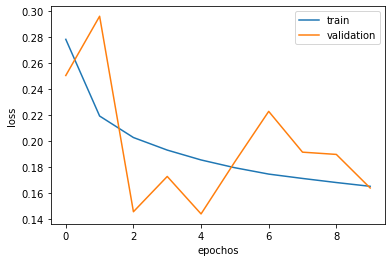

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochos')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

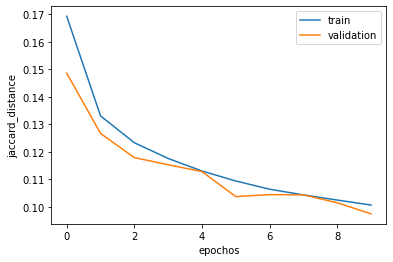

In [28]:
plt.plot(history.history['jaccard_distance'])
plt.plot(history.history['val_jaccard_distance'])
plt.xlabel('epochos')
plt.ylabel('jaccard_distance')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

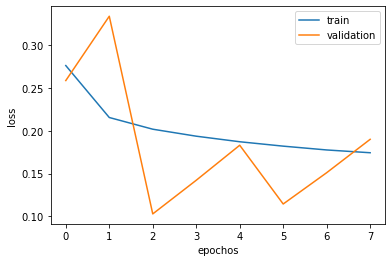

In [29]:
other_model_hist = pickle.load(open('D:\\user_data\\xtrnavska\\dumps\\models\\mod_1_history', "rb"))

plt.plot(other_model_hist['loss'])
plt.plot(other_model_hist['val_loss'])
plt.xlabel('epochos')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


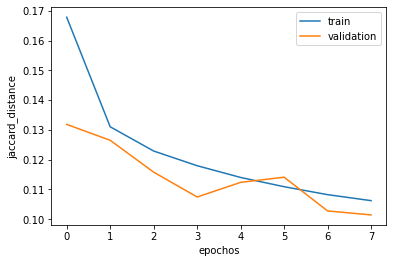

In [30]:
plt.plot(other_model_hist['jaccard_distance'])
plt.plot(other_model_hist['val_jaccard_distance'])
plt.xlabel('epochos')
plt.ylabel('jaccard_distance')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [31]:
names = [f for f in os.listdir(TEST_IMG_PATH)]
len(names)

12696

In [32]:
test_imgs =  np.zeros((len(names), PATCH_HEIGHT, PATCH_WIDTH, PATCH_CHANNELS), dtype=np.uint8)
test_imgs[i] = cv2.imread(TEST_IMG_PATH + name) for i,name in enumerate(names)

# dotrenovanie

In [29]:
model.load_weights(MODEL_PATH + 'mod_1.h5')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[jaccard_distance])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128, 128, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 128, 128, 16) 448         lambda_2[0][0]                   
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 128, 128, 16) 0           conv2d_20[0][0]                  
____________________________________________________________________________________________

In [ ]:
history = model.fit(training_generator, validation_data=validation_generator, epochs=10, 
                    callbacks=[earlystopper, checkpointer])

Epoch 1/10
 296/1249 [======>.......................] - ETA: 24:16 - loss: 0.1993 - jaccard_distance: 0.1212

In [ ]:
import pickle

with open('D:\\user_data\\xtrnavska\\dumps\\models\\' + MODEL_NAME +'_history', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)